# Gabriel (Daeyoung) Yoo - Python 

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas import Series
pd.options.display.float_format = '{:,}'.format
from IPython.display import display, HTML
writer = pd.ExcelWriter('GY_Report.xlsx', engine='xlsxwriter')
pd.set_option('precision', 2)
idx = pd.IndexSlice
import matplotlib.image as mpimg
from IPython.display import display, HTML

## Forecasting with Machine Learning

### Daily Company Sales Data
### Daily sales data from 2017 to 2018 are being used to train the machine to forecast sales in 2019. Forecasted sales data for January 2019 to May 2019 are compared to actual sales data, and there is slight discrepancy. Such discrepancy can be minimized by adding holiday schedule to the learning and forecasting process. Nevertheless, such discrepancy should not be taken at its face value. Per this retail company's direction for merchandise planning, rule of thumb sale-through goal is around 85%, which means there is an extra 15% of merchandise allocated at each store to cover the discrepancy.

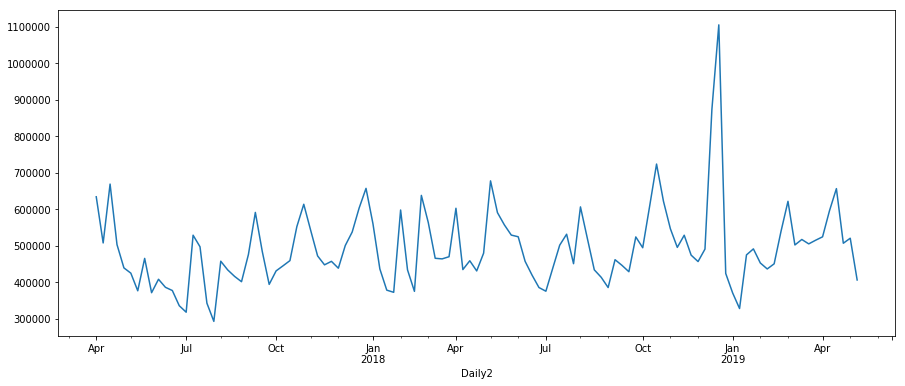

In [2]:
df = pd.read_excel('Daily History2.xlsx',skiprows=20)
df.drop(df[df['POS Qty'] == 0].index,inplace=True)
df['Daily2']= pd.to_datetime(df['Daily'])
df =df.set_index('Daily2')
df = df.drop(['Daily','POS Sales'],axis=1)
y = df['POS Qty'].resample('W').mean()
y.plot(figsize=(15,6))

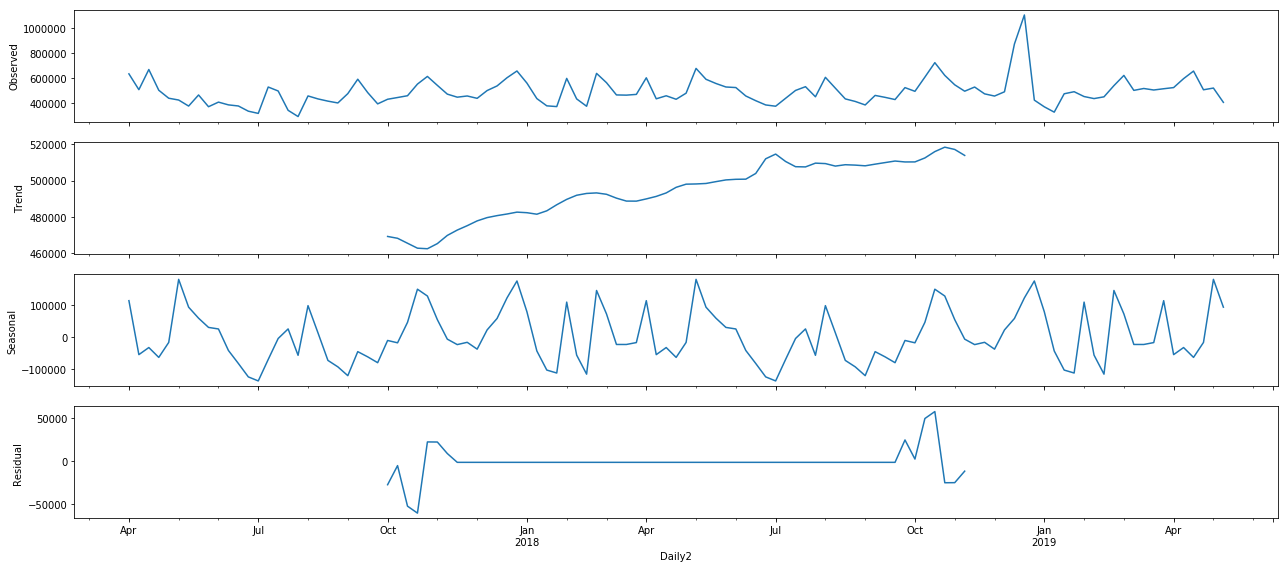

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [4]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [5]:
import warnings
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\gmjj0\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3202.6853880420213
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2804.278933368351
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2628.325856431863
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2290.324787656612
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2657.947451289872
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2614.0218462839175
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2302.840903342128
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2279.0343416114974
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3097.5642188767047
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2745.7574222298363
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2575.6366286294474
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2239.9113804796007
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2791.252553484579
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2735.2238236596277
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2285.9784148893814
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2233.434986268442
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2851.965404538793
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2546.8186652441195


C:\Users\gmjj0\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2531.031542899408
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2259.816027579163
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2234.9021758518593
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2852.6628505251133
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2547.3655195381375
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2616.6826149879544
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2261.8973391410154
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2547.343916687999
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2549.336756715827
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2264.95017368999
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2260.313043135812
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2814.333463254829
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2496.788041215592
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2569.8954438233473
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2229.0279014307253
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2522.063521903599
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2495.0578810762586
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2254.2675626347864
AR

In [6]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4383      0.189      2.320      0.020       0.068       0.809
ma.L1         -0.8684      0.149     -5.826      0.000      -1.161      -0.576
ar.S.L12      -0.4889      0.467     -1.047      0.295      -1.404       0.426
ma.S.L12      -0.3567      0.481     -0.742      0.458      -1.299       0.586
sigma2      2.777e+10   1.19e-11   2.32e+21      0.000    2.78e+10    2.78e+10


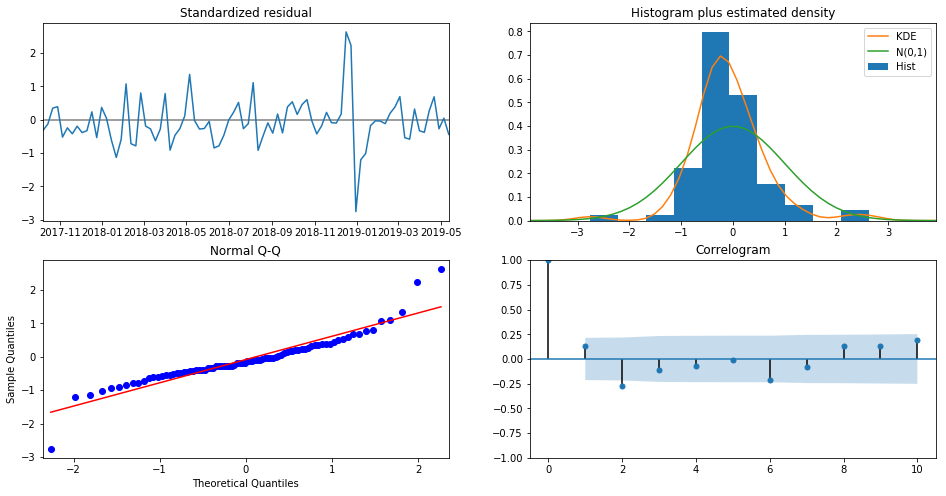

In [7]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [8]:
y.count

<bound method Series.count of Daily2
2017-04-02              633,734.0
2017-04-09     507,220.5714285714
2017-04-16              668,502.0
2017-04-23    502,653.71428571426
2017-04-30    438,830.71428571426
2017-05-07     424,396.4285714286
2017-05-14    376,065.28571428574
2017-05-21     464,848.5714285714
2017-05-28    370,822.85714285716
2017-06-04    407,655.14285714284
2017-06-11    385,635.14285714284
2017-06-18              376,799.0
2017-06-25     335,174.5714285714
2017-07-02    317,406.14285714284
2017-07-09     528,438.8571428572
2017-07-16    496,742.14285714284
2017-07-23    342,043.28571428574
2017-07-30    292,245.85714285716
2017-08-06    457,158.71428571426
2017-08-13     433,366.5714285714
2017-08-20    415,517.71428571426
2017-08-27              400,966.0
2017-09-03              475,655.0
2017-09-10     590,859.2857142857
2017-09-17     483,917.5714285714
2017-09-24              393,612.0
2017-10-01     430,575.5714285714
2017-10-08     444,494.5714285714
2017-10-15 

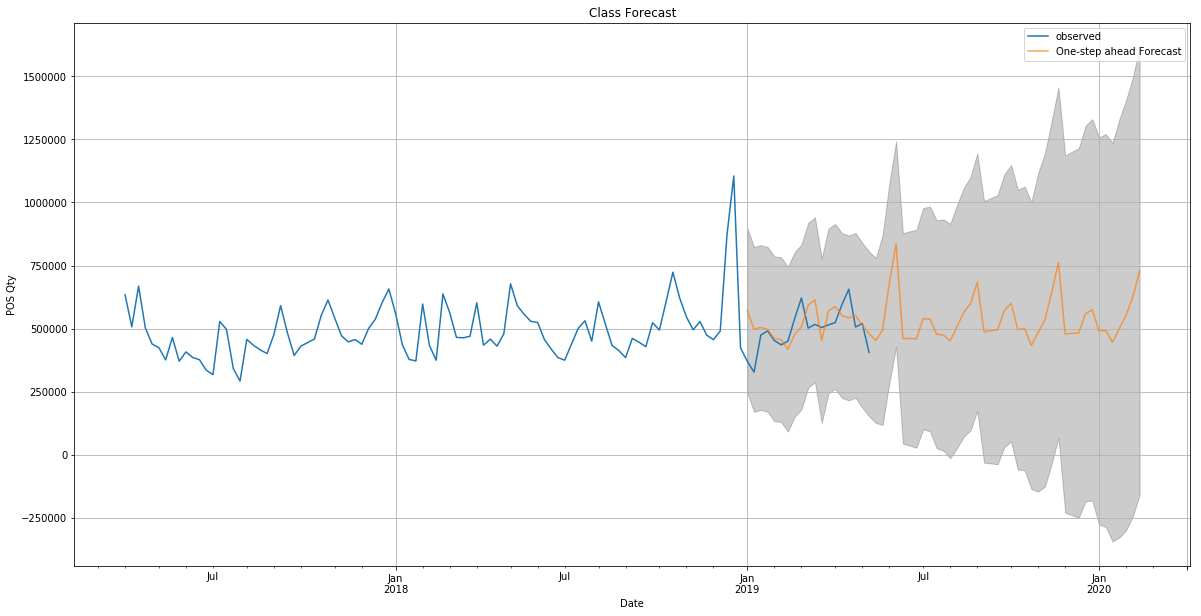

In [9]:
pred = results.get_prediction(start=92, end=150, dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('POS Qty')
plt.legend()
plt.grid()
plt.title('Class Forecast')
plt.show()

In [10]:
y_forecasted = pred.predicted_mean
y_truth = y[92:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7307080222.73


In [11]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 85481.46


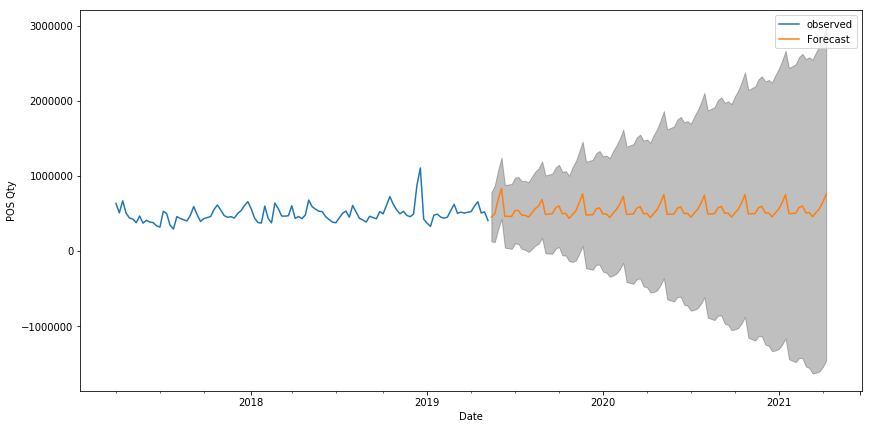

In [12]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('POS Qty')
plt.legend()
plt.show()